In [1]:
import pandas as pd
import numpy as np

In [2]:
try:
    df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\new\ML\spam.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\new\ML\spam.csv", encoding='cp1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5193,ham,"It's wylie, you in tampa or sarasota?",NaN,NaN,NaN
2102,ham,Audrie lousy autocorrect,NaN,NaN,NaN
1566,ham,I am late. I will be there at,NaN,NaN,NaN
3152,ham,I tagged MY friends that you seemed to count a...,NaN,NaN,NaN
248,ham,It didnt work again oh. Ok goodnight then. I.l...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# 1. Data Cleaning 
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
# We will drop last Three columns

In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
4067,spam,TBS/PERSOLVO. been chasing us since Sept forå£...
3485,ham,"Yeah, probably earlier than that"
891,ham,I am great princess! What are you thinking abo...
5116,ham,Thanks. Fills me with complete calm and reassu...
4219,ham,U free on sat rite? U wan 2 watch infernal aff...


In [13]:
# Renaming The cols
df.rename(columns={'v1': 'target','v2':'text'},inplace= True)
df.sample(5)

,target,text
4952,ham,I lost 4 pounds since my doc visit last week w...
3452,ham,Nowadays people are notixiquating the laxinorf...
1757,ham,"Miss ya, need ya, want ya, love ya."
3883,spam,A link to your picture has been sent. You can ...
958,ham,My sort code is and acc no is . The bank is n...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#check For Duplicate Value
df.duplicated().sum()

403

In [19]:
# remove duplicates
df=df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## 2. EDA

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

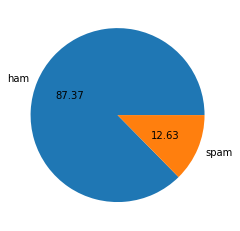

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct= "%0.2f")
plt.show()

In [25]:
# Data is Imbalanced

In [26]:
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# num of word
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
# num of sentence
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# Ham
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#Spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
# Plot Histrogram
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

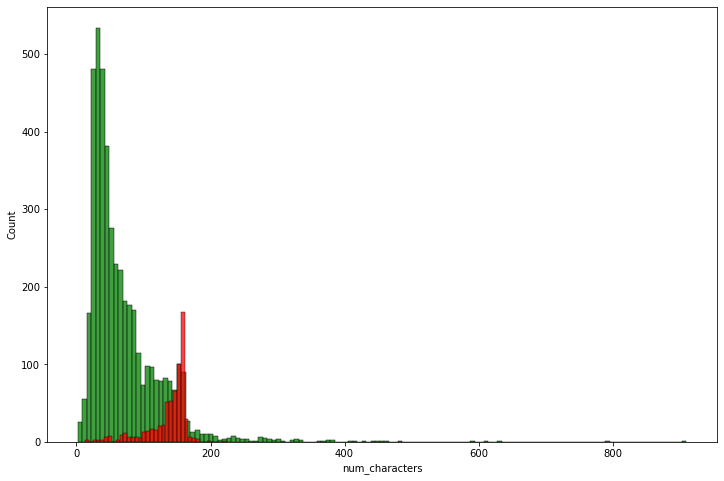

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

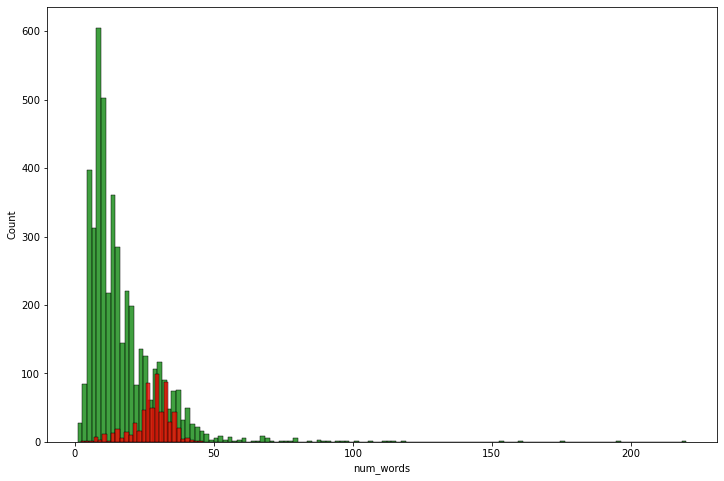

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

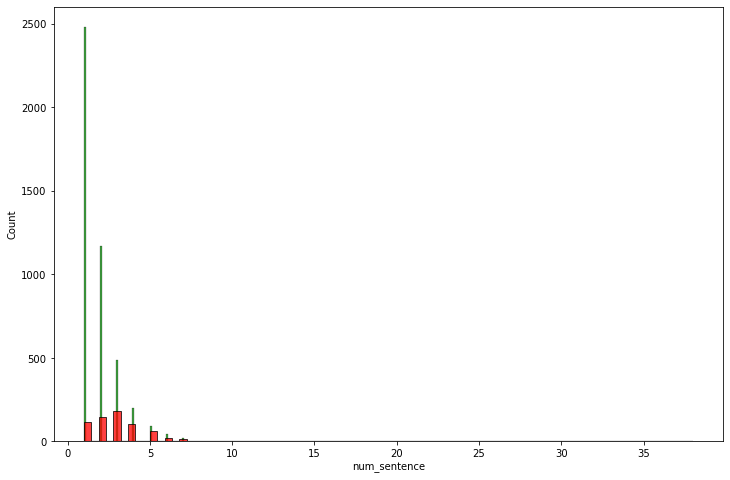

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sentence'],color='green')
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

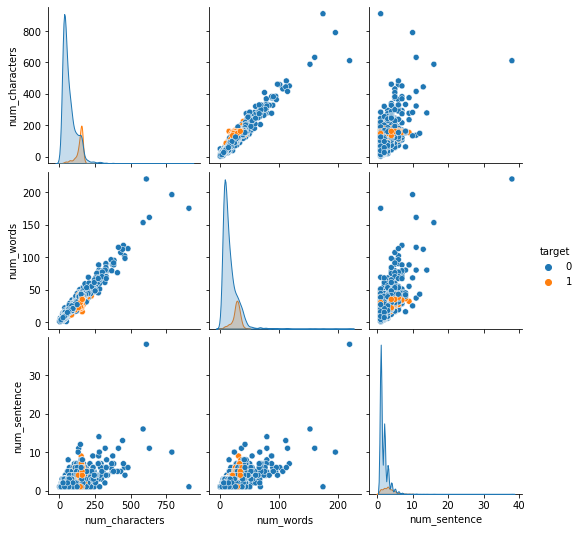

In [41]:
sns.pairplot(df,hue='target')

In [42]:
df[['target','num_characters','num_words','num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentence,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

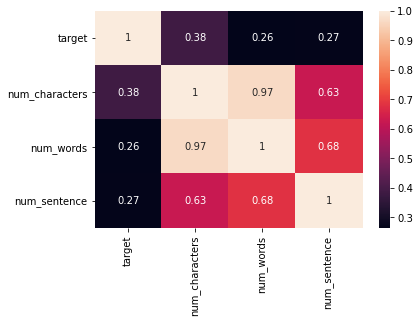

In [43]:
sns.heatmap(df[['target','num_characters','num_words','num_sentence']].corr(),annot= True)

## Data Preprocessing / Text Preprocessing


In [44]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
from nltk.corpus import stopwords
import string

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text= y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)
    
    

In [47]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [48]:
df['transformed_text']=df['text'].apply(transform_text)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus= []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [51]:
len(spam_corpus)

9939

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


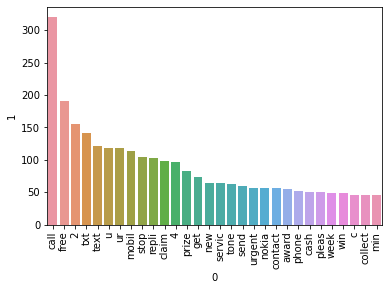

In [52]:
# Counter the Word How many time it come
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [ ]:
df.head()

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv= CountVectorizer()

In [ ]:
#X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
#X.shape

In [ ]:
#y= df['target'].values

In [96]:
#y

In [97]:
#y.shape

In [98]:
#from sklearn.model_selection import train_test_split


In [99]:
#X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)   

In [100]:
#from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [101]:
#gnb=GaussianNB()
#mnb=MultinomialNB()
#bnb=BernoulliNB()

In [102]:
"""gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))"""

'gnb.fit(X_train,y_train)\ny_pred1= gnb.predict(X_test)\nprint(accuracy_score(y_test,y_pred1))\nprint(confusion_matrix(y_test,y_pred1))\nprint(precision_score(y_test,y_pred1))'

In [103]:
"""mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))"""

'mnb.fit(X_train,y_train)\ny_pred2= mnb.predict(X_test)\nprint(accuracy_score(y_test,y_pred2))\nprint(confusion_matrix(y_test,y_pred2))\nprint(precision_score(y_test,y_pred2))'

In [104]:
"""bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

# this one is best in bag of word case"""

'bnb.fit(X_train,y_train)\ny_pred3 = bnb.predict(X_test)\nprint(accuracy_score(y_test,y_pred3))\nprint(confusion_matrix(y_test,y_pred3))\nprint(precision_score(y_test,y_pred3))\n\n# this one is best in bag of word case'

In [105]:
## let Try tfidVectorizer method

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()

In [107]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [108]:
X.shape

(5169, 6708)

In [109]:
y= df['target'].values

In [110]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_trian,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [114]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [115]:
gnb.fit(X_train,y_train)
y_pred4= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [116]:
mnb.fit(X_train,y_train)
y_pred5= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737


In [117]:
bnb.fit(X_train,y_train)
y_pred6= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [118]:
# WE Choice TFIDF --> MNB

# We gona apply every single Algorthim and check which one give better result
!pip install xgboost

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [120]:
lrc= LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc= RandomForestClassifier(n_estimators=50,random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)


In [121]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
    
}

In [122]:
#from sklearn.metrics import accuracy_score,precision_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    precision = precision_score(y_test,y_pred, average='weighted')
    
    return accuracy,precision




In [123]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.7508876160260991)

In [124]:
accuracy_scores= []
precision_scores= []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision -",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  LR
Accuracy -  0.8665377176015474
Precision - 0.7508876160260991
For  SVC
Accuracy -  0.9187620889748549
Precision - 0.9212636875990452
For  NB
Accuracy -  0.9787234042553191
Precision - 0.9786652714800603


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  DT
Accuracy -  0.8665377176015474
Precision - 0.7508876160260991


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  KN
Accuracy -  0.8665377176015474
Precision - 0.7508876160260991


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  RF
Accuracy -  0.8665377176015474
Precision - 0.7508876160260991
For  AdaBoost
Accuracy -  0.867504835589942
Precision - 0.8850767983432604
For  BgC
Accuracy -  0.867504835589942
Precision - 0.8850767983432604
For  ETC
Accuracy -  0.8704061895551257
Precision - 0.8872659668363035


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  GBDT
Accuracy -  0.8665377176015474
Precision - 0.7508876160260991
For  xgb
Accuracy -  0.8665377176015474
Precision - 0.7508876160260991


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
performance_df = pd.DataFrame({'Algorthim':clfs.keys(),'Accuracy':accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [126]:
performance_df

,Algorthim,Accuracy,Precision
2,NB,0.978723,0.978665
1,SVC,0.918762,0.921264
8,ETC,0.870406,0.887266
6,AdaBoost,0.867505,0.885077
7,BgC,0.867505,0.885077
0,LR,0.866538,0.750888
3,DT,0.866538,0.750888
4,KN,0.866538,0.750888
5,RF,0.866538,0.750888
9,GBDT,0.866538,0.750888


In [127]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))